## Lab1
### Questions we can use the data to explore:

REMOVE CELL BEFORE TURN IN

1.Within DFW airport which airline has the most on time or early flights or worst delays?
    *could pick a few states or airport destinations
    
2.When is the best time to fly/What time of day has the worst delays at DFW?

### Columns we should keep from the dataset

REMOVE CELL BEFORE TURN IN
* dayname
* flightdate
* airline
* origin
* dst
* depdelay
* depdelaygroup
* dtimeblk
* distgroup


# Business Understanding

This data set is from The Department of Transportation’s Bureau of Transportation Statistics regarding the On Time Preformance of domestic flights flying from the DFW airport from January to March of this year.

According to the Airports Council International, DFW is the 12th busiest airport in the world, serving around 67 million passangers a year. When booking flights for a trip, there are often many differnt airlines and times of day to choose from. The end goal of analyis on our dataset is to be able to understand for DFW when is the best time to fly and with what airline in order to minimize departure delays when taking a trip.

# Who would benefit
Businesses who send employees on businesss trips and people taking personal trips flying through DFW would benefit from this analysis. If a flight for a business trip gets delayed or cancelled, the company loses money as hours of the client or employee's time are wasted as a result. Additionally, many people get a very limited time for vacation and personal trips. A long delay or cancellation can and casue them to lose valuable time at their destination or with their families.

Using this analysis a person or company can try to schedule thier flights to minimize likelihood of experiencing delays when flying from DFW. If a person has to fly during a time or with an airline with a high likelihood of delay or cancellation, they can use this analysis to help them plan accordingly and be sure to build in flexibility due to delays when planning thier schedules.

Airlines that fly from DFW could also use this analysis to help them see how they stack up to thier competitors and to help them better schedule thier employees. For example, during times when there is a high likelihood of delay they could have more gate and travel agent staff available.

# Model Performance
In order to be considered useful our model would have to perform........ **I think we should save this until the end so we can see how much variance there is in the things we are trying to predict.. our model should probably be between 75-99% accurate.. if there is little variance our model should probably be closer to 99% if there is larger variance our model can probably be farthur away(b/c we cant account for events like weather)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

import pandas as pd
import numpy as np

df = pd.read_csv('https://s2.smu.edu/~tyienger/aaaa-On_Time_On_Time_Performance_2018_1.csv') # read in the csv file

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

Pandas: 0.23.0
Numpy: 1.14.3


In [2]:
#Filter data by needed airport
df_dallas = df[df.Origin == 'DFW']
print (df_dallas.describe())
print (df_dallas.count())

          Year  Quarter         Month    DayofMonth     DayOfWeek  \
count  66085.0  66085.0  66085.000000  66085.000000  66085.000000   
mean    2018.0      1.0      2.013876     15.509556      3.898994   
std        0.0      0.0      0.830702      8.725352      1.973865   
min     2018.0      1.0      1.000000      1.000000      1.000000   
25%     2018.0      1.0      1.000000      8.000000      2.000000   
50%     2018.0      1.0      2.000000     16.000000      4.000000   
75%     2018.0      1.0      3.000000     23.000000      6.000000   
max     2018.0      1.0      3.000000     31.000000      7.000000   

          FlightNum  OriginAirportID  DestAirportID      DepDelay  \
count  66085.000000          66085.0   66085.000000  64716.000000   
mean    2694.560959          11298.0   12867.713763      8.766209   
std     1605.094463              0.0    1585.291240     39.092864   
min        5.000000          11298.0   10136.000000    -22.000000   
25%     1427.000000          1129

In [3]:
#Remove attributes that are not useful for us
for col in ['Year','Quarter','Month','monthname','DayofMonth','DayOfWeek','TailNum','FlightNum','OriginAirportID',
           'OriginCityName','OriginState','OriginStateName','DestAirportID','DestCityName','DestState','DestStateName','CRSDepTime',
           'DepDelayMinutes','TaxiIn','TaxiOut','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes','ArrDelayGroup','ATimeBlk','CancellationReason',
            'Diverted', 'AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','FirstDepTime1','FirstDepTime2',
            'FirstDepTime','TotalAddGTime','LongestAddGTime','DivAirportLandings','DivReachedDest','DivActualElapsedTime','DivArrDelay','DivDistance',
           'CRSElapsedTime','Flights','DepTime']:
    if col in df_dallas:
        del df_dallas[col]

In [4]:
print(df_dallas.dtypes)


dayname               object
FlightDate            object
airline               object
Origin                object
Dest                  object
DepDelay             float64
DepDelayGroup         object
DTimeBlk              object
Cancelled            float64
ActualElapsedTime    float64
Distance             float64
DistGroup             object
dtype: object


## Data Attributes
### Question: a lot of our nominal attributes had columns that were one hot encoded in the original dataset but we left them out and kept the categories for analysis.. good idea? 
### Also can someone check to make sure I categorized them correctly

In [10]:
## Data Attributes:
# create a data description table
data_des = pd.DataFrame()

data_des['Features'] = df_dallas.columns
data_des['Description'] = ['day of flight',
                          'flight date mm/dd/yyyy', 'airline',
                          'origin airport code', 'destination airport code',
                          'depature delay in minutes', 'departure delay group',
                          'departure time block', 'wether or not the flight was cancelled','actual flight time', 
                          'flight distance','flight distance group']
data_des['Attribute'] = ['nominal','interval','nominal','nominal','nominal','ratio',
                         'ordinal','ordinal','ordinal','ratio','ratio','nominal']

data_des

,Features,Description,Attribute
0,dayname,day of flight,nominal
1,FlightDate,flight date mm/dd/yyyy,interval
2,airline,airline,nominal
3,Origin,origin airport code,nominal
4,Dest,destination airport code,nominal
5,DepDelay,depature delay in minutes,ratio
6,DepDelayGroup,departure delay group,ordinal
7,DTimeBlk,departure time block,ordinal
8,Cancelled,wether or not the flight was cancelled,ordinal
9,ActualElapsedTime,actual flight time,ratio


In [11]:
print(df_dallas.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66085 entries, 1160 to 1702659
Data columns (total 12 columns):
dayname              66085 non-null object
FlightDate           66085 non-null object
airline              66085 non-null object
Origin               66085 non-null object
Dest                 66085 non-null object
DepDelay             64716 non-null float64
DepDelayGroup        64716 non-null object
DTimeBlk             66085 non-null object
Cancelled            66085 non-null float64
ActualElapsedTime    64516 non-null float64
Distance             66085 non-null float64
DistGroup            66085 non-null object
dtypes: float64(4), object(8)
memory usage: 6.6+ MB
None


In [12]:
#Figure out what data is missing
df_dallas.isnull().sum()


dayname                 0
FlightDate              0
airline                 0
Origin                  0
Dest                    0
DepDelay             1369
DepDelayGroup        1369
DTimeBlk                0
Cancelled               0
ActualElapsedTime    1569
Distance                0
DistGroup               0
dtype: int64

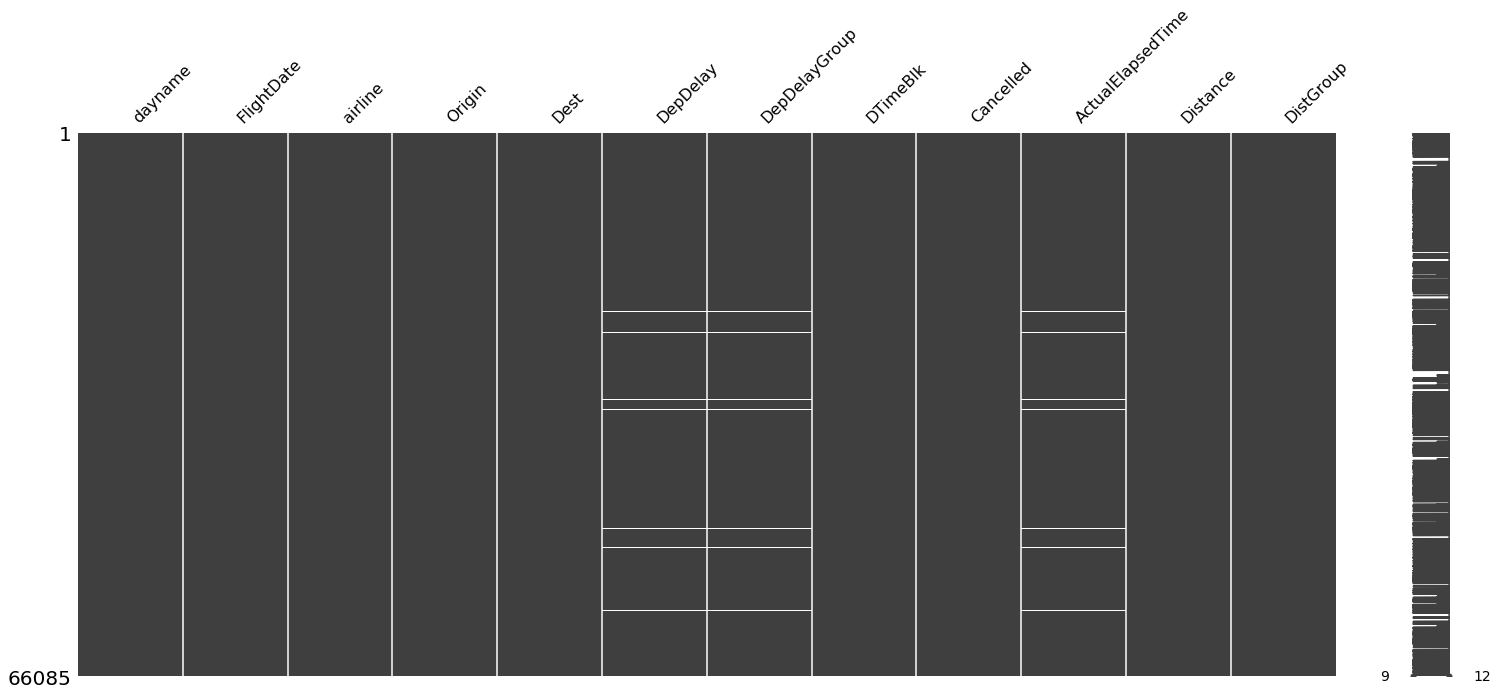

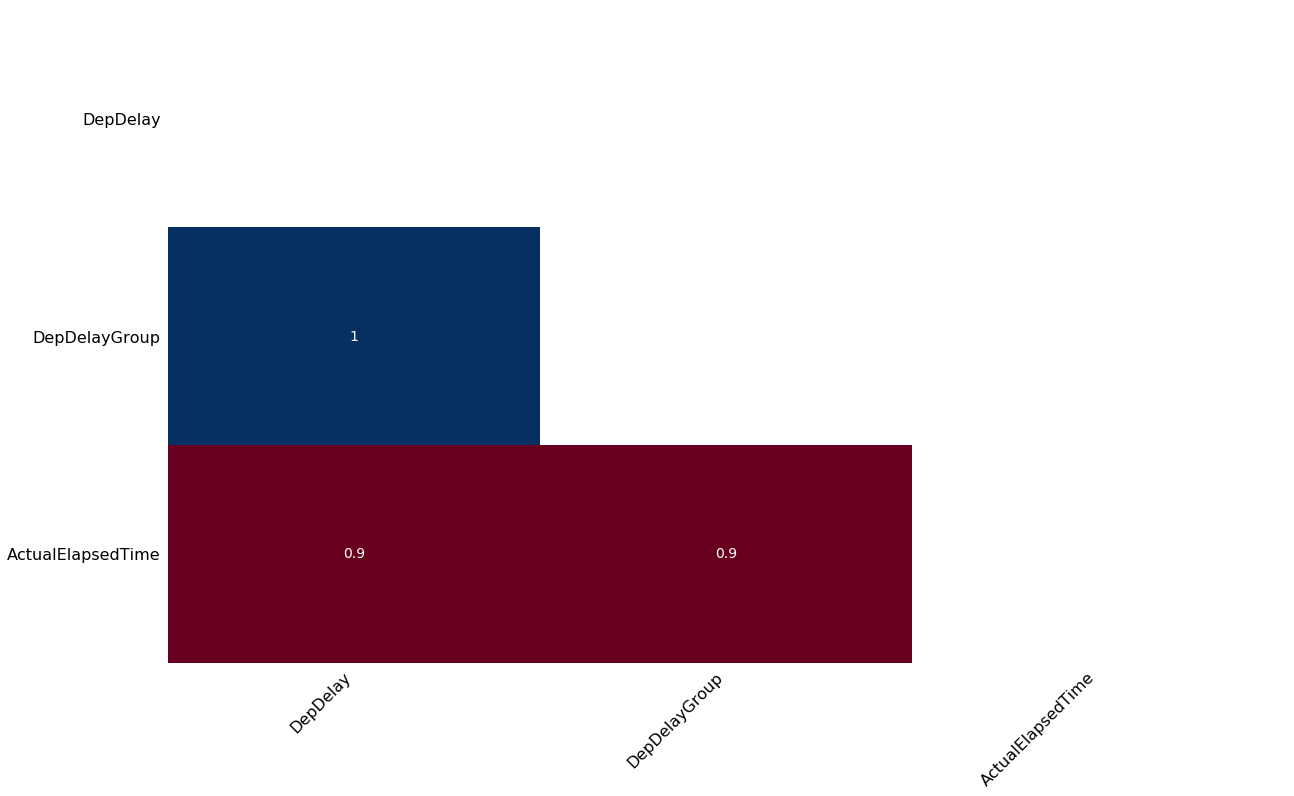

In [13]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn 

mn.matrix(df_dallas.sort_values(by=['Dest']))
mn.heatmap(df_dallas.sort_values(by=['Dest']))

In [14]:
#Group data by destination 
df_dallas_grouped = df_dallas.groupby(by=['Dest'])
#Show the number of unique destinations
print (df_dallas.Dest.nunique())
#Show the number of flights to each destination
print (df_dallas_grouped.count())

155
      dayname  FlightDate  airline  Origin  DepDelay  DepDelayGroup  DTimeBlk  \
Dest                                                                            
ABI       456         456      456     456       442            442       456   
ABQ       660         660      660     660       651            651       660   
ACT       335         335      335     335       326            326       335   
AEX       256         256      256     256       245            245       256   
AMA       505         505      505     505       486            486       505   
ASE       322         322      322     322       312            312       322   
ATL      1660        1660     1660    1660      1648           1648      1660   
AUS       957         957      957     957       943            943       957   
BDL       167         167      167     167       156            156       167   
BHM       419         419      419     419       412            412       419   
BIL        90          9

In [15]:
"""Need to figure out if we actually want to impute the data, since delay varies wildly on 
flights even flights to the same destination, same airline, same day have unpredictable delays
"""
# now use this grouping to fill the data set in each group, then transform back

# create new dataframe that fills groups with the median of that group
func = lambda grp: grp.fillna(grp.median())
df_dallas_imputed = df_dallas_grouped.transform(func)

# fill any deleted columns
col_deleted = list( set(df_dallas.columns) - set(df_dallas_imputed.columns)) # in case the median operation deleted columns
df_dallas_imputed[col_deleted] = df_dallas[col_deleted]

print (df_dallas_imputed.info())

# 4. drop rows that still had missing values after grouped imputation
df_dallas_imputed.dropna(inplace=True)

print (df_dallas_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66085 entries, 1160 to 1702659
Data columns (total 12 columns):
DepDelay             66085 non-null float64
Cancelled            66085 non-null float64
ActualElapsedTime    66085 non-null float64
Distance             66085 non-null float64
airline              66085 non-null object
DepDelayGroup        64716 non-null object
DTimeBlk             66085 non-null object
Origin               66085 non-null object
FlightDate           66085 non-null object
DistGroup            66085 non-null object
Dest                 66085 non-null object
dayname              66085 non-null object
dtypes: float64(4), object(8)
memory usage: 6.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64716 entries, 1160 to 1702659
Data columns (total 12 columns):
DepDelay             64716 non-null float64
Cancelled            64716 non-null float64
ActualElapsedTime    64716 non-null float64
Distance             64716 non-null float64
airline            

## Items left to finish:
    * Look at question about data attributes
    * Data Visualization:
        * Choose and visualize distributions for a subset of single attributes
            * Visualize at least 5 attributes, at least one categorical and at least one numeric.
        * Visualize relationships between a subset of attributes
            * Interpret the implications for each visualization. 
            * Visualize at least three subsets of the attributes.
    *Exceptional Work
        *Ideas? Backup plan do grad part